# K-Means Implementation
This implements the k-means algorithm using python and numpy.  A visual is also displayed and the notebook compares the results with sklearn.

Author: Nicholas Miller<br>
Date: Jan 9, 2021

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_data(count=500,seed=0):
    '''
    Generate some random data
    '''
    np.random.seed(seed)
    return (np.random.rand(count,2)*9+1).T

def initial_centroids(data, k):
    '''
    Generate random initial centroids
    '''
    mx = np.min(data)
    mn = np.max(data)
    return (np.random.rand(k,2)*(mx-mn)+(mn)).T

def assign_clusters(data, k):
    '''
    Assign the cluster
    '''
    clusters = {i: [] for i in range(k.shape[1])}
    dist = []
    for i in range(k.shape[1]):
        dist.append(np.linalg.norm(data - k.T[i].reshape(2,1), axis=0))
    np_dist = np.array(dist)
    d_min = np.argmin(np_dist, axis=0)
    for i,c in enumerate(data.T):
        clusters[d_min[i]].append(c)
    return clusters

def move_centroids(clusters, k):
    '''
    Move the centroids
    '''
    new_centroids = []
    for i,v in clusters.items():
        if len(v) > 0:
            new_centroids.append(np.mean(np.array(v),axis=0))
        else:
            new_centroids.append(k.T[i])
    return np.array(new_centroids).T

def kmeans(data, n_clusters=8, quiet=True):
    '''
    Perform all steps of k-means until convergence
    '''
    i = 0
    centroids = initial_centroids(data, n_clusters)
    while True:
        clusters = assign_clusters(data,centroids)
        new_centroids = move_centroids(clusters, centroids)
        
        if np.max(np.abs(centroids - new_centroids)) < np.finfo(float).eps:
            break
        else:
            i+=1
            centroids=new_centroids
    
    if not quiet:
        print(f'Number of iterations: {i}')
        plot(clusters, centroids)
    
    return clusters, centroids.T

def plot(clusters, centroids):
    '''
    Create a plot of the final
    '''
    plt.figure(figsize=(15, 10))
    for i in range(centroids.shape[1]):
        if len(clusters[i]) > 0:
            plt.scatter(x=np.array(clusters[i]).T[0], y=np.array(clusters[i]).T[1], label='Cluster '+str(i))
    plt.scatter(x=centroids[0], y=centroids[1], label='Centroids', marker='x')
    plt.legend()
    plt.show()

Number of iterations: 8


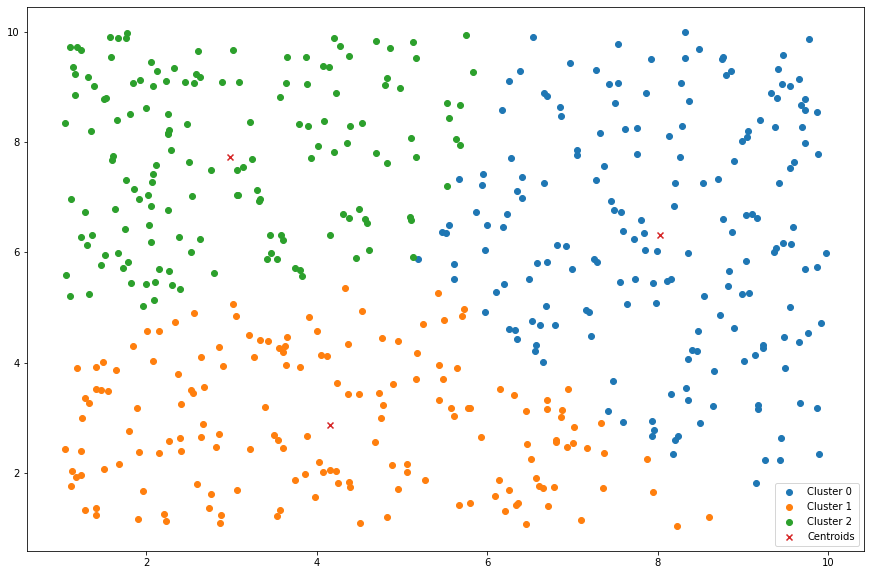

In [3]:
data = get_data(seed=42)
clusters, centroids = kmeans(data, 3, False)

## Performance Comparison with SKLearn

In [4]:
%%timeit
_ = kmeans(data, 3)

12.3 ms ± 895 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(data.T)

In [6]:
%%timeit
kmeans = KMeans(n_clusters=3, random_state=0).fit(data.T)

47.4 ms ± 4.53 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Results Comparison with SKLearn

In [7]:
# Review Differences
display(kmeans.cluster_centers_)
display(centroids)

array([[4.43291511, 2.92897156],
       [2.99173957, 7.71088016],
       [8.10208627, 6.59047965]])

array([[8.01839268, 6.31122352],
       [4.15058269, 2.87905122],
       [2.97736935, 7.72282185]])